# Basic Lexical Processing

As an exercise to perform basic lexical processing, we would be using the text from an ebook "Alice in Wonderland" from the URL https://www.gutenberg.org/

Steps involved are:

- Plot the word frequency of the book for top 15 words
- Remove the stop words from that
- Re-plot the word frequency with available significant words post removal of stop words

### Plotting Word Frequencies

In [1]:
# import the required libraries
import requests
from nltk import FreqDist #nltk (Natural Language Tool Kit is used for NLP processing)
import seaborn as sns

In [2]:
# read the book from the url
url = "https://www.gutenberg.org/files/11/11-0.txt"
aliceInWonderland = requests.get(url)
#print(aliceInWonderland.text)

In [3]:
# Define a function to plot bar graph of the top 10 word frequncies

def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(x=labels, y=counts)
    return plot

In [4]:
# Split the text in the book to get the words
words_in_book = aliceInWonderland.text.split()

<Axes: >

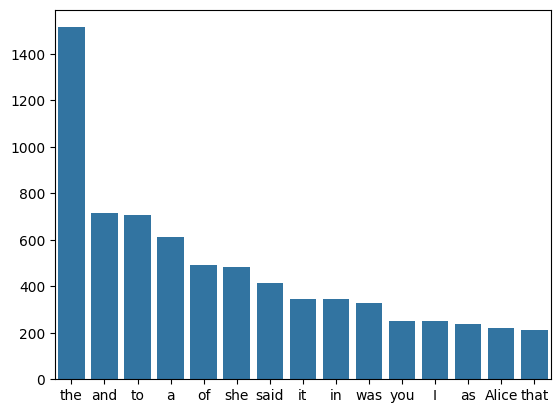

In [5]:
plot_word_frequency(words_in_book, 15)

### Stopwords

In [6]:
import nltk
from nltk.corpus import stopwords

In [7]:
# Let us download the stopwords corpus from the Natural Language Toolkit (NLTK) repository to your local system. This corpus contains predefined lists of stopwords for multiple languages, which can be used in various NLP tasks
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nehaverma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [10]:
# Example to remove stop words from a sentence

string = "Education is the most powerful weapon which you can use to change the world"

words = string.split()
print("Words in the sentence - ", words)

words_without_stopwords = [word for word in words if word not in stopwords.words('english')]
print("\nWords in the sentence without stop words - ", words_without_stopwords)

Words in the sentence -  ['Education', 'is', 'the', 'most', 'powerful', 'weapon', 'which', 'you', 'can', 'use', 'to', 'change', 'the', 'world']

Words in the sentence without stop words -  ['Education', 'powerful', 'weapon', 'use', 'change', 'world']


In [11]:
text_without_stopwords = " ".join(words_without_stopwords)
print(text_without_stopwords)

Education powerful weapon use change world


<Axes: >

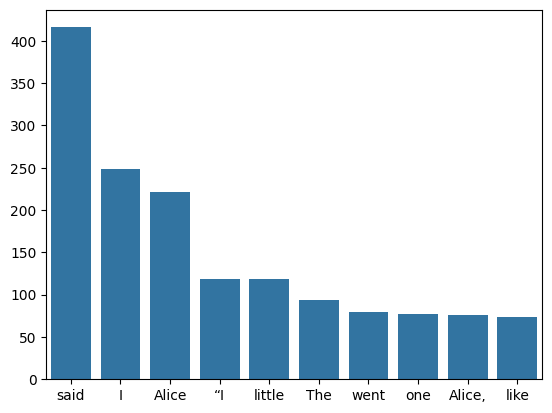

In [12]:
#### Similarly lets remove the stop words from the Alice in Wonderland book text

words_in_book_no_stop = [word for word in words_in_book if word not in stopwords.words('english')]

plot_word_frequency(words_in_book_no_stop, 10)


#### As see there are few punctuations and also stop words coming up due to case difference

In [13]:
# Lets re-run out pre-processing by correcting this

words_in_book = aliceInWonderland.text.lower().split()

words_in_book_no_stop = [word for word in words_in_book if word not in stopwords.words('english')]


<Axes: >

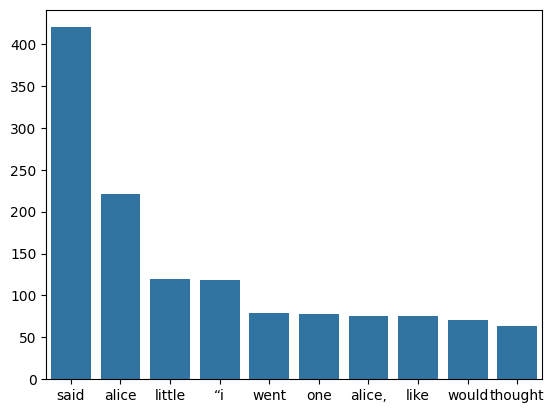

In [14]:
plot_word_frequency(words_in_book_no_stop, 10)